In [76]:
from tensorflow import keras
import numpy as np
from tensorflow.keras import preprocessing
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf


import os

import lime 
from lime import lime_image

In [22]:
ls

1011661.jpeg     Untitled.ipynb   effnet_model.h5


In [23]:
from tensorflow import keras
model = keras.models.load_model('effnet_model.h5')

In [77]:
import matplotlib.image as mpimg

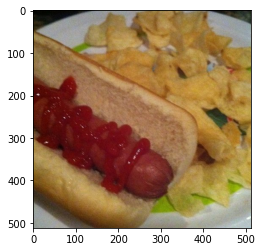

In [80]:
img = mpimg.imread('1011661.jpeg')
plt.imshow(img)

In [24]:
model.compile()

In [25]:

def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = preprocessing.image.load_img(img_path, target_size=(224, 224))
        x = preprocessing.image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        #x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

In [49]:
image_size = 224
img_height = 224
img_width = 224

In [51]:
imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in ['1011661.jpeg']]
img_array = np.array([img_to_array(img) for img in imgs])
output = preprocess_input(img_array)

In [72]:
display(Image(output))

NameError: name 'Image' is not defined

In [53]:
preds = model.predict(output)

In [54]:
decode_predictions(preds)

[[('n07697537', 'hotdog', 0.6888893),
  ('n07880968', 'burrito', 0.02926741),
  ('n02321529', 'sea_cucumber', 0.025038315),
  ('n07711569', 'mashed_potato', 0.01782071),
  ('n07579787', 'plate', 0.005424782)]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


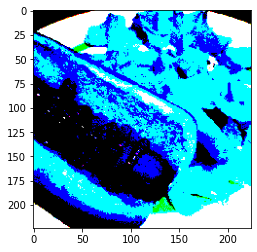

In [70]:
plt.imshow()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


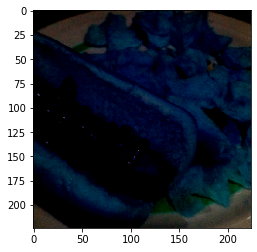

In [67]:
plt.imshow(output[0] / 255)

In [13]:
explainer = lime_image.LimeImageExplainer()

In [56]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(output[0].astype('double'), model.predict, 
                                         top_labels=5, hide_color=None, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

CPU times: user 2min 15s, sys: 2min 11s, total: 4min 27s
Wall time: 52.9 s


In [57]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


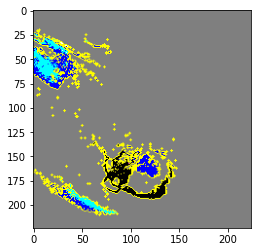

In [58]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, 
                                            hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


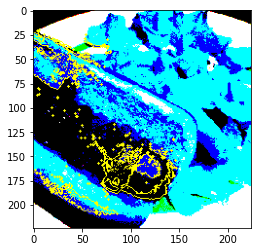

In [59]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


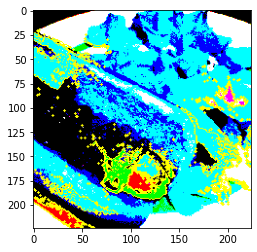

In [60]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


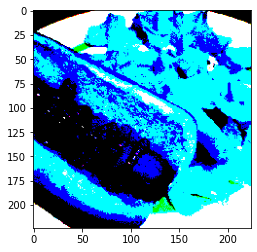

In [61]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


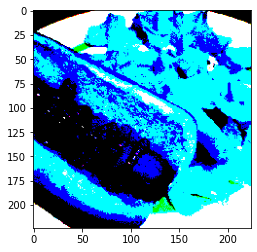

In [62]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

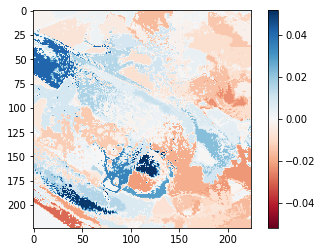

In [63]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()